In [447]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from scipy.special import expit

<IPython.core.display.Javascript object>


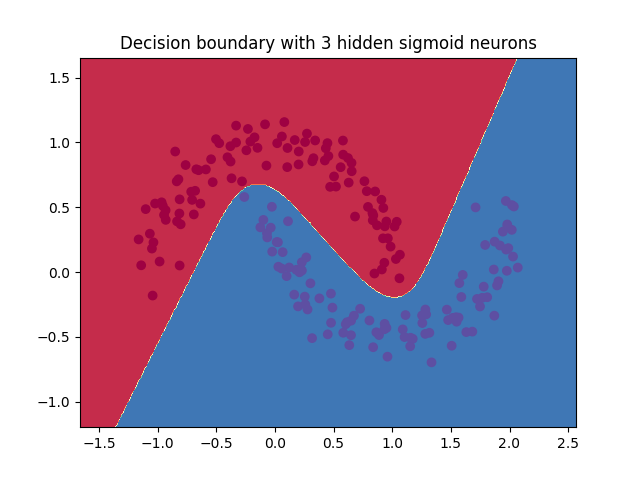

In [448]:
np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise = 0.099)
plt.scatter(X[:,0], X[:,1], s = 40, c = Y, cmap = plt.cm.Spectral)

In [449]:
def plot_decision_boundary(function):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    h = 0.01
    
    x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = function(np.c_[x.ravel(), y.ravel()])
    Z = Z.reshape(x.shape)
    
    plt.contourf(x, y, Z, cmap = plt.cm.Spectral)
    plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Spectral)

In [450]:
#Initialize hyper-parameters
num_examples = len(X)
input_layers = 2
output_layers = 2

learning_rate = 0.01
regularizer = 0.01

In [451]:
#Cross-entropic loss
def loss(model) :
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2'] 
    
    z1 = X.dot(w1) + b1
    a1 = expit(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    normalized_scores = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
    
    log_scores = -1 * np.log(normalized_scores[range(num_examples), Y])
    data_loss = np.sum(log_scores)
    data_loss += (regularizer/2) * ( np.sum(np.square(w1)) + np.sum(np.square(w2)) )
    
    return data_loss/num_examples

In [452]:
def hypothesis(model, x) :
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    
    z1 = x.dot(w1) + b1
    a1 = expit(z1)
    z2 = a1.dot(w2) + b2
    
    #Softmax normalization of scores
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)

    return np.argmax(probs, axis = 1)

In [453]:
#Gradient descent using backpropagation
def train_model(hidden_layers, epochs = 60000, print_loss = False) :
    np.random.seed(0)
    w1 = np.random.randn(input_layers, hidden_layers)/ np.sqrt(input_layers)
    b1 = np.zeros((1, hidden_layers))
    w2 = np.random.randn(hidden_layers, output_layers)/ np.sqrt(hidden_layers)
    b2 = np.zeros((1, output_layers))
    
    model = {}
    
    for i in range(epochs) :

        #Forward propagation
        z1 = X.dot(w1) + b1
        a1 = expit(z1)
        z2 = a1.dot(w2) + b2
        
        exp_scores = np.exp(z2)
        probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
        
        #Backpropagation
        delta3 = probs
        delta3[range(num_examples), Y] -= 1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis = 0, keepdims = True)
        
        delta2 = np.multiply(delta3.dot(w2.T), a1 * (1 - a1))
        dw1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis = 0)
        
        dw2 += regularizer * w2
        dw1 += regularizer * w1
        
        w1 += -1 * learning_rate * dw1
        w2 += -1 * learning_rate * dw2
        b1 += -1 * learning_rate * db1
        b2 += -1 * learning_rate * db2
        
        model = {'w1' : w1, 'w2' : w2, 'b1' : b1, 'b2' : b2}
        
        if print_loss and i % 1000 == 0 :
            print("Loss after epoch ", i, " is ", loss(model))
            
    return model        

In [454]:
model = train_model(3, print_loss = True)
plot_decision_boundary(lambda x : hypothesis(model, x))
plt.title("Decision boundary with 3 hidden sigmoid neurons")

Loss after epoch  0  is  0.627619279902
Loss after epoch  1000  is  0.264056918178
Loss after epoch  2000  is  0.263180114621
Loss after epoch  3000  is  0.260399944814
Loss after epoch  4000  is  0.0222398179218
Loss after epoch  5000  is  0.0186200550434
Loss after epoch  6000  is  0.0180386262219
Loss after epoch  7000  is  0.0178567947038
Loss after epoch  8000  is  0.0177796328683
Loss after epoch  9000  is  0.0177403306404
Loss after epoch  10000  is  0.0177179022209
Loss after epoch  11000  is  0.0177041706239
Loss after epoch  12000  is  0.0176953879725
Loss after epoch  13000  is  0.0176896114851
Loss after epoch  14000  is  0.0176857402198
Loss after epoch  15000  is  0.0176831106702
Loss after epoch  16000  is  0.0176813060248
Loss after epoch  17000  is  0.0176800570031
Loss after epoch  18000  is  0.0176791862129
Loss after epoch  19000  is  0.017678575123
Loss after epoch  20000  is  0.0176781436618
Loss after epoch  21000  is  0.0176778372569
Loss after epoch  22000  is 